In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
from sklearn.cluster import KMeans
%matplotlib inline

In [29]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off')
    ax[1].axis('off')
    f.tight_layout()
    plt.show()
    
def gradient(clusters):
    width=300
    gradient = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        gradient[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return gradient

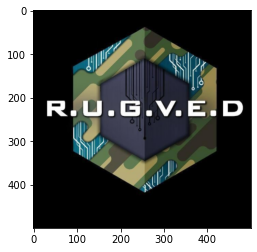

In [26]:
img = cv.imread("logo.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

dim = (500, 500)
img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
plt.imshow(img)

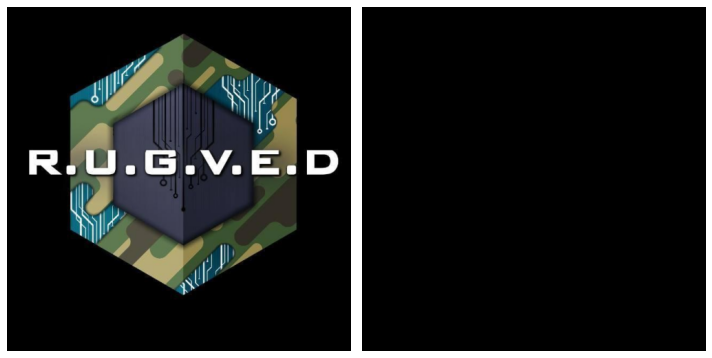

In [27]:
img_temp = img.copy()
unique, counts = np.unique(img_temp.reshape(-1, 3), axis=0, return_counts=True)
img_temp[:,:,0], img_temp[:,:,1], img_temp[:,:,2] = unique[np.argmax(counts)]

show_img_compar(img, img_temp)

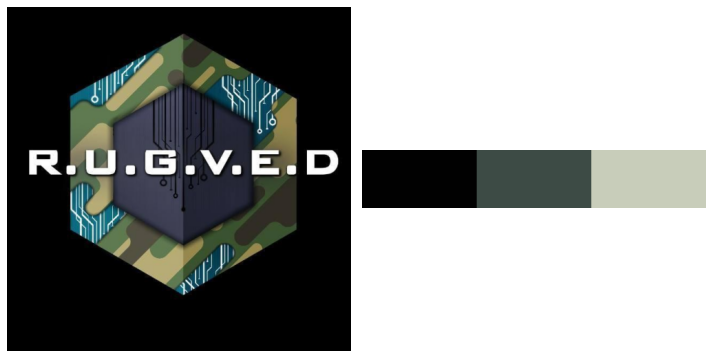

In [30]:
clt_2 = KMeans(n_clusters=3)
clt_2.fit(img.reshape(-1, 3))
show_img_compar(img, gradient(clt_2))

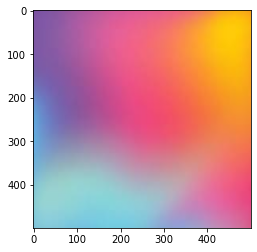

In [32]:
img_2 = cv.imread("img2.jpg")
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

dim = (500, 500)
img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)
plt.imshow(img_2)

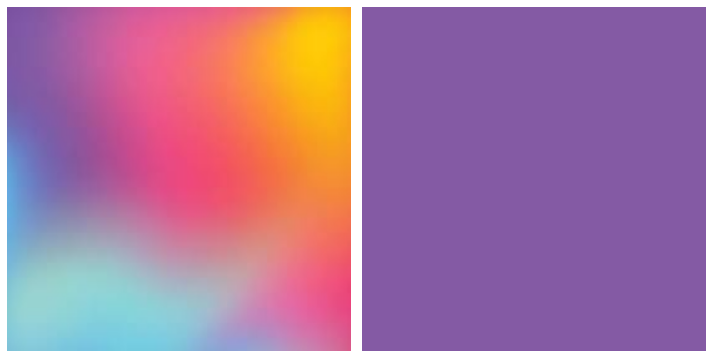

In [33]:
img_temp_2 = img_2.copy()
unique, counts = np.unique(img_temp_2.reshape(-1, 3), axis=0, return_counts=True)
img_temp_2[:,:,0], img_temp_2[:,:,1], img_temp_2[:,:,2] = unique[np.argmax(counts)]

show_img_compar(img_2, img_temp_2)

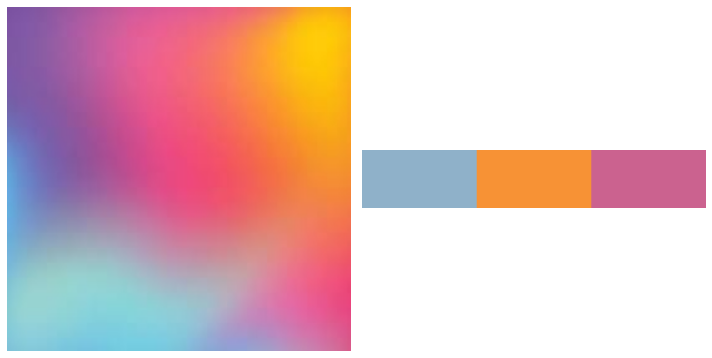

In [34]:
clt_3 = KMeans(n_clusters=3)
clt_3.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, gradient(clt_3))